# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

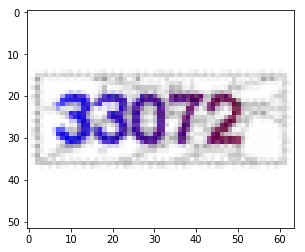

In [33]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('1.gif')

plt.imshow(img)

## Apply PCA on face image

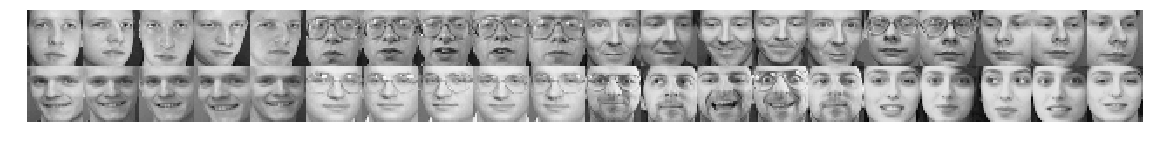

In [3]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
fea_Train = fea_Train - np.mean(fea_Train)
fea_Test = fea_Test - np.mean(fea_Test)
# end answer
from show_face import show_face
show_face(fea_Train)

(200, 1024) -----
(1024, 1024)


/Users/Alan/workspace/homework/ml/hw4/ml2019fall_hw4/pca/show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


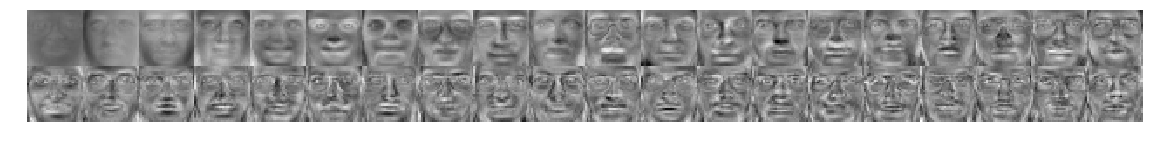

In [26]:
# 2. Run PCA
# begin answer
from pca import PCA
print(fea_Train.shape, "-----")
w, v = PCA(fea_Train)
print(v.shape)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(v.T)
# end answer

pca error rate: 0.235
original pic:
recover with PCA from dim = 128


/Users/Alan/workspace/homework/ml/hw4/ml2019fall_hw4/pca/show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


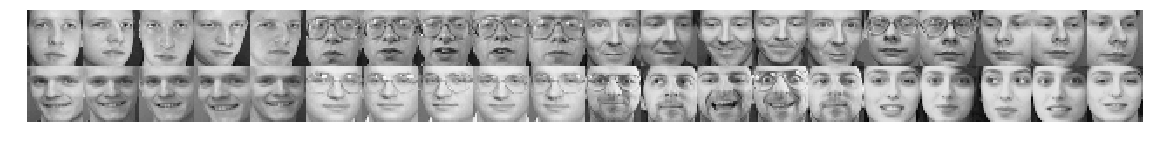

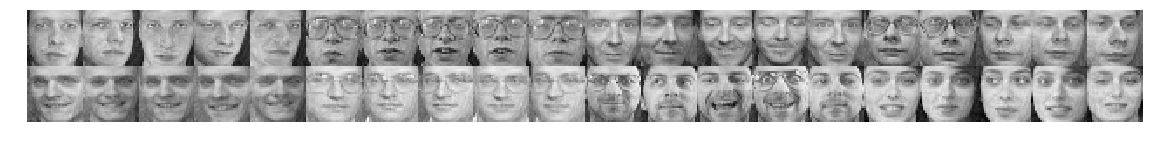

In [37]:
# 4. Project data on to low dimensional space
# begin answer
dim = 128
V = v[:, 0:dim]
fea_train_reduce = np.matmul(fea_Train, V)
fea_test_reduce = np.matmul(fea_Test, V)
# end answer

# 5. Run KNN in low dimensional space
# begin answer
from knn import knn
y_ret = knn(fea_test_reduce, fea_train_reduce, gnd_Train, 2)
error = np.sum((gnd_Test != y_ret)) / len(y_ret)
print("pca error rate: {}".format(error))
# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
print("original pic:")
show_face(fea_Train)
recover = np.matmul(fea_train_reduce, V.T)
print("recover with PCA from dim = {}".format(dim))
show_face(recover)
# end answer  

## You are encouraged to apply LDA on this dataset!

In [43]:
from LDA import LDA

# Your code here
# begin answer
v, w = LDA(fea_Train, gnd_Train)
dim = 128
V = v[:, 0:dim]
fea_train_reduce = np.matmul(fea_Train, V)
fea_test_reduce = np.matmul(fea_Test, V)
# end answer

# 5. Run KNN in low dimensional space
# begin answer
from knn import knn
y_ret = knn(fea_test_reduce, fea_train_reduce, gnd_Train, 2)
error = np.sum((gnd_Test != y_ret)) / len(y_ret)
print("LDA error rate: {}".format(error))
# end answer

LDA error rate: 0.055
